In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn, rand
from matplotlib.pylab import close
import matplotlib.pyplot as plt
import sympy as sy
#Input Sections
which = input('Which kind of data file are you choosing? csv or dat format?: ')
File1 = input('What is the name of your experimental data file?: ')
File2 = input('What is the name of your experimental data file?: ')
File3 = input('What is the name of your experimental data file?: ')

#Importing basic data from a CSV-style experimental data file
if (which == 'csv'):
  df = pd.read_csv(File)
elif (which == 'dat'):
  df = pd.read_csv(File1, sep='\s+')
  df2 = pd.read_csv(File2, sep='\s+')
  df3 = pd.read_csv(File3, sep='\s+')

In [3]:
df.describe()

A1            A2            A3            A4       Cathode
count  10175.000000  10175.000000  10175.000000  10175.000000  10175.000000
mean     785.139853    586.949877    497.045405    492.228010    443.207273
std      107.328905     97.724545     90.657679     83.637344     22.253578
min      489.000000    314.000000    360.000000    367.000000    407.000000
25%      710.000000    522.000000    428.000000    428.000000    432.000000
50%      775.000000    579.000000    486.000000    482.000000    441.000000
75%      850.000000    640.000000    553.000000    545.000000    451.000000
max     1586.000000   2396.000000   1029.000000   1442.000000    921.000000

In [4]:
df2.describe()

A1             A2             A3             A4  \
count  126137.000000  126137.000000  126137.000000  126137.000000   
mean     2005.526578    1689.637172    1715.112917    1540.636039   
std       183.265086     167.310085     178.581654     158.855080   
min       621.000000     464.000000     407.000000     407.000000   
25%      1891.000000    1585.000000    1604.000000    1442.000000   
50%      2008.000000    1694.000000    1718.000000    1543.000000   
75%      2125.000000    1799.000000    1832.000000    1643.000000   
max      4096.000000    4096.000000    3710.000000    4096.000000   

             Cathode  
count  126137.000000  
mean     2226.708642  
std        92.623252  
min      1248.000000  
25%      2216.000000  
50%      2241.000000  
75%      2263.000000  
max      4096.000000

In [5]:
df3.describe()

A1             A2             A3             A4  \
count  134299.000000  134299.000000  134299.000000  134299.000000   
mean     1798.925003    1510.567346    1515.961965    1404.550816   
std       235.875518     210.688555     225.909593     206.158143   
min       513.000000     303.000000     362.000000     370.000000   
25%      1684.000000    1406.000000    1404.000000    1301.000000   
50%      1814.000000    1524.000000    1530.000000    1418.000000   
75%      1941.000000    1638.000000    1653.000000    1530.000000   
max      4096.000000    4096.000000    4096.000000    4096.000000   

             Cathode  
count  134299.000000  
mean     1950.071058  
std       189.224704  
min       565.000000  
25%      1943.000000  
50%      1989.000000  
75%      2027.000000  
max      4096.000000

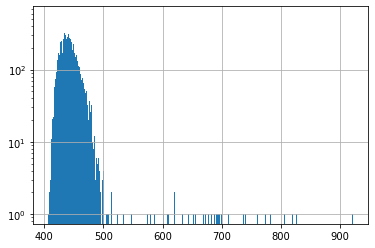

In [6]:
df['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Pedestal_Cathode_histgram_log.png")

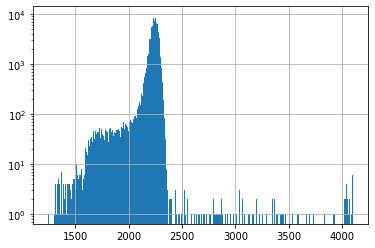

In [7]:
df2['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Nofoil_Cathode_histgram_log.png")

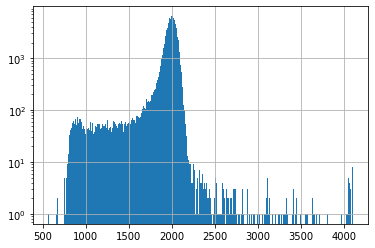

In [8]:
df3['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Withfoil_Cathode_histgram_log.png")

In [ ]:
"""
Error Propagation Law for arbitrary functions f(x, y)
import math
x, y = sy.symbols("x y")
function = input("f(x,y)= ")
f = eval(function)
err_f = math.sqrt(errdf0**2 * (sy.diff(f, x).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2 + errdf1**2 * (sy.diff(f, y).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2)

#Creating a new columns for some indirect observables
def indirect(frame):
    return f.subs([(x, frame.iloc[xaxisdata]), (y, frame.iloc[yaxisdata])])
df['f(x, y)'] = df.apply(indirect, axis = 1)
"""

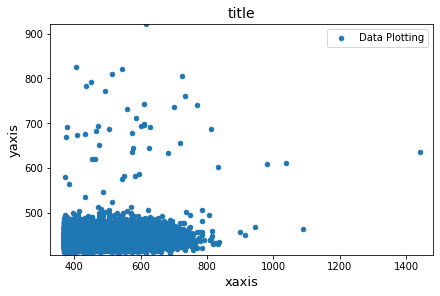

In [9]:
xaxisdata = input('Which Columns do you want to use for x axis to this Data plotting?')
yaxisdata = input('Which Columns do you want to use for y axis to this Data plotting?')
Title = input('What is the title of your Graph?: ')
Xlabel = input('What is the label of x axis?: ')
Ylabel = input('What is the label of y axis?: ')

xaxisdata = int(xaxisdata)
yaxisdata = int(yaxisdata)
df = df[df > 0]
num = len(df)
Xstd = df[df.columns[xaxisdata]].std()
Ystd = df[df.columns[yaxisdata]].std()

#Errors for direct observables
err_df0 = DataFrame(Xstd/np.sqrt(num -1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
err_df1 =  DataFrame(Ystd/np.sqrt(num - 1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
#Preparing Plotting Figure & Environment
fig, axes = plt.subplots(constrained_layout = True, facecolor = 'white')
axes.axis([df[df.columns[xaxisdata]].min() - 40, df[df.columns[xaxisdata]].max() + 40, df[df.columns[yaxisdata]].min() - 1, df[df.columns[yaxisdata]].max() + 1])

#Creating Scatter Graph of Experimental Data
df.plot(kind='scatter', x=df.columns[xaxisdata], y=df.columns[yaxisdata], xerr=err_df0, yerr=err_df1, ax=axes,label = 'Data Plotting')
axes.set_title(Title, fontsize = 14)
axes.set_xlabel(Xlabel, fontsize = 13)
axes.set_ylabel(Ylabel, fontsize = 13)
axes.legend()
plt.savefig("figure.png", transparent=True)

In [ ]:
"""
#Linear Estimation by using Least Squared Regression
df2 = df[df.columns[xaxisdata]] * df[df.columns[yaxisdata]]
df22 = pd.DataFrame({'Covariance': df2})
df3 = pd.concat([df, df22], axis = 1)
Cov = df22.mean() - df[df.columns[xaxisdata]].mean() * df[df.columns[yaxisdata]].mean()
a = Cov / (df[df.columns[xaxisdata]].std())**2
b = - a * df[df.columns[xaxisdata]].mean() + df[df.columns[yaxisdata]].mean()
x1 = np.linspace(df[df.columns[xaxisdata]].min() - 20, df[df.columns[xaxisdata]].max() + 20, 100)
l = a.values[0]
k = b.values[0]
errdf0 = err_df0.values[0][0]
errdf1 = err_df1.values[0][0]
y1 = l * x1 + k

#Plotting on the Scatter Graph
axes.plot(x1, y1, color = '#ff7f00', label = 'Linear Estimation')
axes.legend()

#Identification of the regression line
x = sy.symbols('x')
eq = l * x + k
print(eq)
print(err_f)
"""

In [21]:
df4 = (df3 - df).dropna(how='all')
df4.describe()

A1            A2            A3            A4       Cathode
count  10175.000000  10175.000000  10175.000000  10175.000000  10175.000000
mean    1010.528452    922.563047   1013.813956    904.802948   1492.404226
std      255.343507    228.928195    238.273290    219.880051    184.417565
min     -285.000000   -571.000000   -247.000000   -175.000000    173.000000
25%      874.500000    800.000000    883.000000    791.000000   1484.500000
50%     1031.000000    936.000000   1027.000000    919.000000   1531.000000
75%     1173.500000   1069.000000   1169.000000   1039.000000   1568.000000
max     2928.000000   3206.000000   2396.000000   3632.000000   3606.000000

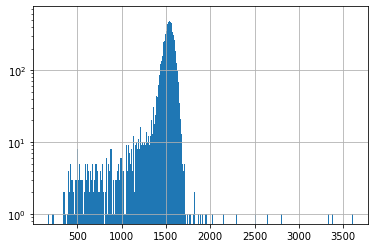

In [24]:
df4['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Nofoil_error.png")